In [342]:
# Importação das Libs
import pandas as pd

In [383]:
# Realizando leitura do arquivo excel
df_Teams = pd.read_excel('Brazilian_Teams_Statistics.xlsx')

In [344]:
# Realizando leitura do arquivo excel
df_Players = pd.read_excel('Brazilian_Players_Statistics.xlsx')

In [384]:
df_Teams.head(4)

,Game,Home,HomeGoal,HomePossession,HomePassingAccuracy,HomeShotsTarget,HomeSaves,Away,AwayGoal,AwayPossession,AwayPassingAccuracy,AwayShotsTarget,AwaySaves
0,1,América (MG),0,46,74,12,57.0,Fluminense,3,54,83,50,100.0
1,1,Palmeiras,2,52,82,29,75.0,Cuiabá,1,48,78,33,60.0
2,1,Bragantino,2,55,75,54,66.0,Bahia,1,45,69,33,71.0
3,1,Botafogo (RJ),2,33,76,25,87.0,São Paulo,1,67,87,50,33.0


In [347]:
df_Players.head(2)

,Game,Team,Holder,Player,Number,Nation,Pos,Age,Min,Gls,...,Launch%,AvgLen,Att.10,Launch%.1,AvgLen.1,Opp,Stp,Stp%,#OPA,AvgDist
0,1,América (MG),Y,Henrique Almeida,19,br BRA,FW,31-323,62,0,...,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0
1,1,América (MG),N,Wellington Paulista,9,br BRA,FW,38-358,28,0,...,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0


In [348]:
# Substituindo valores nulos por 0
df_Players.fillna(0, inplace=True)
# Substituindo valores vazios por 0
df_Players.replace('', 0, inplace=True)

In [435]:
# Substituindo valores nulos por 0
df_Teams.fillna(0, inplace=True)
# Substituindo valores vazios por 0
df_Teams.replace('', 0, inplace=True)

In [349]:
# Remove espaços em branco ao redor dos nomes dos jogadores
df_Players['Player'] = df_Players['Player'].str.strip()
# Remove espaços em branco ao redor dos nomes dos times
df_Players['Team'] = df_Players['Team'].str.strip()
# Converte para inteiro o número da partida
df_Players['Game'] = df_Players['Game'].astype(int)

In [404]:
# Remove espaços em branco ao redor dos nomes dos times
df_Teams['Home'] = df_Teams['Home'].str.strip()
# Remove espaços em branco ao redor dos nomes dos times
df_Teams['Away'] = df_Teams['Away'].str.strip()
# Converte para inteiro o número da partida
df_Teams['Game'] = df_Teams['Game'].astype(int)

In [351]:
df_Players.head(2)

,Game,Team,Holder,Player,Number,Nation,Pos,Age,Min,Gls,...,Launch%,AvgLen,Att.10,Launch%.1,AvgLen.1,Opp,Stp,Stp%,#OPA,AvgDist
0,1,América (MG),Y,Henrique Almeida,19,br BRA,FW,31-323,62,0,...,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0
1,1,América (MG),N,Wellington Paulista,9,br BRA,FW,38-358,28,0,...,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0


In [352]:
def checkTacticalScheme(game, team, df_check):

    countDF = 0
    countMCD = 0
    countMCA = 0
    countATA = 0
    tactical = ''
        
    # Iterando sobre as linhas do DataFrame
    for index, row in df_check.iterrows():
        
        position = row['Pos'].split(',')
        
        # Contando posições
        if position[0] in ['LB', 'CB', 'RB', 'DF']:
            countDF += 1
        elif position[0] in ['WB', 'DM']:
            countMCD += 1            
        elif position[0] in ['AM', 'CM', 'RM', 'LM', 'RW', 'LW', 'MF']:
            countMCA += 1
        elif position[0] in ['LF', 'RF', 'FW']:
            countATA += 1
        
    # Montagem da string com a formação
    if(countDF > 0):
        tactical = tactical + str(countDF) + '-'
    if(countMCD > 0):
        tactical = tactical + str(countMCD) + '-'
    if(countMCA > 0):
        tactical = tactical + str(countMCA) + '-'        
    if(countATA > 0):
        tactical = tactical + str(countATA) + '-'
        
    # Remove o último caracter
    tactical = tactical[:-1]
    
    # Obtendo o tempo da formação utilizada
    time = df_check['Min'].min()
    
    return {'Game': game, 'Team': team, 'Tactical': tactical, 'Time': time}

In [353]:
df_Tactical = pd.DataFrame(columns=['Game', 'Team', 'Tactical', 'Time'])

# Iterando sobre as rodadas
for game in range(1, 39):
    
    # Iterar sobre as linhas do DataFrame onde a coluna 'Game' é igual a 1
    for index, row in df_Teams[df_Teams['Game'] == game].iterrows():

        # Filtrando o DataFrame para incluir apenas o Botafogo titular por rodada
        df_GameHome = df_Players.loc[(df_Players['Team'] == row['Home']) & (df_Players['Game'] == game), ['Game', 'Team', 'Player', 'Pos', 'Holder', 'Min']]
        # Filtrando o DataFrame para incluir apenas o adversário do Botafogo titular por rodada
        df_GameAway = df_Players.loc[(df_Players['Team'] == row['Away']) & (df_Players['Game'] == game), ['Game', 'Team', 'Player', 'Pos', 'Holder','Min']]

        # Filtrando o DataFrame para incluir apenas o time da casa titular
        df_GameHomeHolder = df_GameHome.loc[(df_GameHome['Holder'] == 'Y')]
        # Filtrando o DataFrame para incluir apenas o time da visitante titular
        df_GameAwayHolder = df_GameAway.loc[(df_GameAway['Holder'] == 'Y')]

        # Busca a tática inicial do time da casa
        tacticalHome = checkTacticalScheme(game, df_GameHomeHolder['Team'].iloc[0], df_GameHomeHolder)
        # Busca a tática inicial do time visitante
        tacticalAway = checkTacticalScheme(game, df_GameAwayHolder['Team'].iloc[0], df_GameAwayHolder)   
        # Adicionando as novas linhas ao final do DataFrame
        df_Tactical = df_Tactical.append(tacticalHome, ignore_index=True)
        df_Tactical = df_Tactical.append(tacticalAway, ignore_index=True)

In [354]:
df_Tactical.head(4)

,Game,Team,Tactical,Time
0,1,América (MG),4-2-3-1,62
1,1,Fluminense,4-2-2-2,45
2,1,Palmeiras,4-2-3-1,60
3,1,Cuiabá,4-2-3-1,45


Cálculo Overall

In [355]:
def checkPlayerSector(position):
    # Formata as posições
    position = position.split(',')
    # Define o setor do jogador com base na posição
    if position[0] in ['GK']:
        return 'GK'
    elif position[0] in ['LB', 'CB', 'RB', 'DF']:
        return 'DF'
    elif position[0] in ['WB', 'DM']:
        return 'MCD'           
    elif position[0] in ['AM', 'CM', 'RM', 'LM', 'RW', 'LW', 'MF']:
        return 'MCA'    
    elif position[0] in ['LF', 'RF', 'FW']:
        return 'ATA'        

In [356]:
# Aplica função para identificar o setor do jogador pela posição
df_Players['Sector'] = df_Players['Pos'].apply(checkPlayerSector)

In [357]:
# Calcular o valor máximo usando uma abordagem vetorizada
df_Players['DeadBall'] = round(((df_Players['PKatt'] * 10) + (df_Players['PK'] * 60) + (df_Players['Dead'] * 30) - ((df_Players['PKatt'] - df_Players['PK']) * 50)), 2)

In [358]:
def calculateStatisticsDeadBall(player, setor, game, team): 

    value = 0
    valueMax = df_Players['DeadBall'].max()

    # Loop para percorrer todas as linhas do DataFrame
    #for index, row in df_Players.iterrows():
    #    rowPenaltyCharged = row['PKatt']
    #    rowPenaltyMissed = row['PKatt'] - row['PK']
    #    rowPenaltyConverted = row['PK']
    #    rowDeadBallPasses = row['Dead']
#
    #    # Calcula o overall usando média ponderada com pesos específicos
    #    rowValueMax = ((rowPenaltyCharged * 10) + (rowPenaltyConverted * 60) + (rowDeadBallPasses * 30) - (rowPenaltyMissed * 50))
#
    #    if(rowValueMax > valueMax):
    #        valueMax = round(rowValueMax, 2)

    # DataFrame com estatísticas por jogador, posição e partida
    df_PlayersStatistics = df_Players[(df_Players['Player'] == player) & (df_Players['Game'] == game) & (df_Players['Sector'] == setor) & (df_Players['Team'] == team)]
    # Calcula o número de penaltis cobrados do jogador
    penaltyCharged = df_PlayersStatistics['PKatt'].item()
    # Calcula o número de penaltis perdidos do jogador
    penaltyMissed = df_PlayersStatistics['PKatt'].item() - df_PlayersStatistics['PK'].item()
    # Calcula o número de penaltis convertidos do jogador
    penaltyConverted = df_PlayersStatistics['PK'].item()
    # Calcula o número de passes em cobrança de faltas
    deadBallPasses = df_PlayersStatistics['Dead'].item()
    # Calcula o overall de bola parada ponderado em porcentagem
    value = round(((penaltyCharged * 10) + (penaltyConverted * 60) + (deadBallPasses * 30) - (penaltyMissed * 50)), 2)

    # Ajusta o valor entre 0 e 100
    value = (value / valueMax) * 100
    
    # Calcula a porcentagem e retorna
    return round(value, 2)

In [359]:
# Calcular o valor máximo usando uma abordagem vetorizada
df_Players['Recovery'] = round(((df_Players['Def 3rd'] + df_Players['Mid 3rd'] + df_Players['Att 3rd']) * 20) + (df_Players['Recov'] * 80), 2)

In [360]:
def calculateStatisticsRecovery(player, setor, game, team): 

    value = 0
    valueMax = df_Players['Recovery'].max()
#
    ## Loop para percorrer todas as linhas do DataFrame
    #for index, row in df_Players.iterrows():
    #    rowBallRecovery = row['Recov']
    #    rowDefensiveTackles = row['Def 3rd']
    #    rowCentralTackles = row['Mid 3rd']
    #    rowOffensiveTackles = row['Att 3rd']
#
    #    # Calcula o overall usando média ponderada com pesos específicos
    #    rowValueMax = ((rowDefensiveTackles + rowCentralTackles + rowOffensiveTackles) * 20) + (rowBallRecovery * 80)
#
    #    if(rowValueMax > valueMax):
    #        valueMax = round(rowValueMax, 2)
            
    # DataFrame com estatísticas por jogador, posição e partida
    df_PlayersStatistics = df_Players[(df_Players['Player'] == player) & (df_Players['Game'] == game) & (df_Players['Sector'] == setor) & (df_Players['Team'] == team)]
    # Calcula o número de recuperação de bola
    ballRecovery = df_PlayersStatistics['Recov'].item()
    # Calcula o número de tentantiva de desarme na defesa
    defensiveTackles = df_PlayersStatistics['Def 3rd'].item()
    # Calcula o número de tentantiva de desarme no meio campo
    centralTackles = df_PlayersStatistics['Mid 3rd'].item()
    # Calcula o número de tentantiva de desarme no ataque
    offensiveTackles = df_PlayersStatistics['Att 3rd'].item()

    # Calculate recovery by weighting all tackles and ball recoveries
    value = round(((defensiveTackles + centralTackles + offensiveTackles) * 20) + (ballRecovery * 80), 2)
    
    # Ajusta o valor entre 0 e 100
    value = (value / valueMax) * 100

    # Calcula a porcentagem e retorna
    return round(value, 2)

In [361]:
# Calcular o valor máximo usando uma abordagem vetorizada
df_Players['Pass'] = round(((df_Players.iloc[:, 39] * 15) +
                            (df_Players.iloc[:, 42] * 15) +
                            (df_Players.iloc[:, 45] * 15) +
                            (df_Players['KP'] * 35) +
                            (df_Players['Ast'] * 20)), 2)

In [362]:
def calculateStatisticsPass(player, setor, game, team): 

    value = 0
    valueMax = df_Players['Pass'].max()

    # Loop para percorrer todas as linhas do DataFrame
    #for index, row in df_Players.iterrows():
    #    rowShortPass = row.iloc[39]
    #    rowMediumPass = row.iloc[42]
    #    rowLongPass = row.iloc[45]
    #    rowPassesShot = row['KP']
    #    rowAssists = row['Ast']
#
    #    # Calcula o overall usando média ponderada com pesos específicos
    #    rowValueMax = ((rowShortPass * 15) +
    #                   (rowMediumPass * 15) +
    #                   (rowLongPass * 15) +
    #                   (rowPassesShot * 35) +
    #                   (rowAssists * 20))
#
    #    if(rowValueMax > valueMax):
    #        valueMax = round(rowValueMax, 2)
            
    # DataFrame com estatísticas por jogador, posição e partida
    df_PlayersStatistics = df_Players[(df_Players['Player'] == player) & (df_Players['Game'] == game) & (df_Players['Sector'] == setor) & (df_Players['Team'] == team)]
    # Calcula o número de passes recebidos no setor ofensivo
    shortPass = df_PlayersStatistics.iloc[:,39].item()
    # Calcula o número de passes recebidos no setor ofensivo
    mediumPass = df_PlayersStatistics.iloc[:,42].item()
    # Calcula o número de passes recebidos no setor ofensivo
    longPass = df_PlayersStatistics.iloc[:,45].item()
    # Calcula o número de impedimentos do jogador
    passesShot = df_PlayersStatistics['KP'].item()
    # Calcula o número de minutos jogados do jogador
    assists = df_PlayersStatistics['Ast'].item()

    # Calcula o overall do passe usando média ponderada com pesos específicos
    value = round(((shortPass * 15) +
                   (mediumPass * 15) +
                   (longPass * 15) +
                   (passesShot * 35) +
                   (assists * 20)), 2)

    # Garante que o overall do passe esteja entre 0 e 100
    value = (value / valueMax) * 100

    # Calcula a porcentagem e retorna
    return round(value, 2)

In [363]:
# Calcular o valor máximo usando uma abordagem vetorizada
df_Players['LostBall'] = round((((df_Players['Att'] - df_Players['Cmp']) * 5) +
                                ((df_Players.iloc[:,32] - df_Players['Succ']) *  20) +
                                 (df_Players['Err'] * 20) +
                                 (df_Players['Mis'] * 20) +
                                 (df_Players.iloc[:,123] * 35)), 2)

In [364]:
def calculateStatisticsLostBall(player, setor, game, team): 

    value = 0
    valueMax = df_Players['LostBall'].max()
    # Loop para percorrer todas as linhas do DataFrame
    #for index, row in df_Players.iterrows():
    #    rowPassAttempt = row['Cmp']
    #    rowPassFull = row['Att']
    #    rowDribbleAttempt = row.iloc[32]
    #    rowDribbleFull = row['Succ']
    #    rowDefensiveErrors = row['Err']
    #    rowDomainError = row['Mis']
    #    rowLostAirDispute = row.iloc[123]
    #    rowLostBallPass = rowPassAttempt - rowPassFull
    #    rowLostBallDribble = rowDribbleAttempt - rowDribbleFull
    #
    #    # Calcula o overall usando média ponderada com pesos específicos
    #    rowValueMax = ((rowLostBallPass * 5) +
    #                   (rowLostBallDribble *  20) +
    #                   (rowDefensiveErrors * 20) +
    #                   (rowDomainError * 20) +
    #                   (rowLostAirDispute * 35))
#
    #    if(rowValueMax > valueMax):
    #        valueMax = round(rowValueMax, 2)
            
    # DataFrame com estatísticas por jogador, posição e partida
    df_PlayersStatistics = df_Players[(df_Players['Player'] == player) & (df_Players['Game'] == game) & (df_Players['Sector'] == setor) & (df_Players['Team'] == team)]
    # Calcula o número de passes tentados
    passAttempt = df_PlayersStatistics['Att'].item()
    # Calcula o número de passes completos
    passFull = df_PlayersStatistics['Cmp'].item()
    # Calcula o número de dribles tentados
    dribbleAttempt = df_PlayersStatistics.iloc[:,32].item()
    # Calcula o número de dribles completos
    dribbleFull = df_PlayersStatistics['Succ'].item()
    # Calcula o número de erros que gerou finalização
    defensiveErrors = df_PlayersStatistics['Err'].item()
    # Calcula o número de erros de domínio de bola
    domainError = df_PlayersStatistics['Mis'].item()
    # Calcula o número de disputas aéreas perdidas
    lostAirDispute = df_PlayersStatistics.iloc[:,123].item()
    # Calcula a quantidade de passes errados
    lostBallPass = passAttempt - passFull
    # Calcula a quantidade de dribles errados
    lostBallDribble = dribbleAttempt - dribbleFull     

    # Calcula o overall de bola perdida usando média ponderada com pesos específicos
    value = round(((lostBallPass * 5) +
                   (lostBallDribble *  20) +
                   (defensiveErrors * 20) +
                   (domainError * 20) +
                   (lostAirDispute * 35)), 2)

    # Garante que o overall de bola perdida esteja entre 0 e 100
    value = (value / valueMax) * 100

    # Calcula a porcentagem e retorna
    return round(100 - value, 2)

In [365]:
# Calcular o valor máximo usando uma abordagem vetorizada
df_Players['Kick'] = round((((df_Players['PKatt'] - (df_Players['PKatt'] - df_Players['PK'])) * 25) +
                            ((df_Players['PKatt'] - df_Players['PK']) * 15) +
                             (df_Players['SoT'] * 20) +
                            ((df_Players['Sh'] - df_Players['SoT']) * 15) +
                             (df_Players['Gls'] * 25)), 2)

In [366]:
def calculateStatisticsKick(player, setor, game, team): 

    value = 0
    valueMax = df_Players['Kick'].max()

    # Loop para percorrer todas as linhas do DataFrame
    #for index, row in df_Players.iterrows():
    #    rowPenaltyMissed = row['PKatt'] - row['PK']
    #    rowPenaltyScored = row['PKatt'] - rowPenaltyMissed
    #    rowShotOnTarget = row['SoT']
    #    rowShotOffTarget = row['Sh'] - rowShotOnTarget
    #    rowGoals = row['Gls']
    #
    #    # Calcula o overall usando média ponderada com pesos específicos
    #    rowValueMax = ((rowPenaltyScored * 25) +
    #                   (rowPenaltyMissed * 15) +
    #                   (rowShotOnTarget * 20) +
    #                   (rowShotOffTarget * 15) +
    #                   (rowGoals * 25))
#
    #    if(rowValueMax > valueMax):
    #        valueMax = round(rowValueMax, 2)
            
    # DataFrame com estatísticas por jogador, posição e partida
    df_PlayersStatistics = df_Players[(df_Players['Player'] == player) & (df_Players['Game'] == game) & (df_Players['Sector'] == setor) & (df_Players['Team'] == team)]
    # Calcula o número de penaltis perdidos do jogador
    penaltyMissed = df_PlayersStatistics['PKatt'].item() - df_PlayersStatistics['PK'].item()
    # Calcula o número de penaltis convertidos pelo jogador
    penaltyScored = df_PlayersStatistics['PKatt'].item() - penaltyMissed
    # Calcula o número de chutes no alvo
    shotOnTarget = df_PlayersStatistics['SoT'].item()
    # Calcula o número de chutes fora do alvo
    shotOffTarget = df_PlayersStatistics['Sh'].item() - shotOnTarget
    # Calcula o número de gols
    goals = df_PlayersStatistics['Gls'].item()

    # Calcula o overall de tentativas usando pesos específicos
    value = round(((penaltyScored * 25) +
                   (penaltyMissed * 15) +
                   (shotOnTarget * 20) +
                   (shotOffTarget * 15) +
                   (goals * 25)), 2)

    # Garante que o overall de finalização esteja entre 0 e 100
    value = (value / valueMax) * 100

    # Calcula a porcentagem e retorna
    return round(value, 2)

In [367]:
def calculateStatisticsFoulReceived(player, setor, game, team): 
    # DataFrame com estatísticas por jogador, posição e partida
    df_PlayersStatistics = df_Players[(df_Players['Player'] == player) & (df_Players['Game'] == game) & (df_Players['Sector'] == setor) & (df_Players['Team'] == team)]
    # Calcula o número de faltas recebidas do jogador
    foulReceived = df_PlayersStatistics['Fld'].item()
    # Calcula o número de faltas recebidas do jogador
    maxFoulReceived = df_Players['Fld'].max()

    # Calcula em porcentagem a quantidade de faltas recebidas comparado a outros jogadores
    value = (foulReceived / maxFoulReceived) * 100

    # Calcula a porcentagem e retorna
    return round(value, 2)

In [368]:
def calculateStatisticsFoulCommitted(player, setor, game, team): 
    # DataFrame com estatísticas por jogador, posição e partida
    df_PlayersStatistics = df_Players[(df_Players['Player'] == player) & (df_Players['Game'] == game) & (df_Players['Sector'] == setor) & (df_Players['Team'] == team)]
    # Calcula o número de faltas cometidas do jogador
    foulCommitted = df_PlayersStatistics['Fls'].item()
    # Calcula o número de faltas cometidas do jogador
    maxFoulCommitted = df_Players['Fls'].max()

    # Calcula em porcentagem a quantidade de faltas cometidas comparado a outros jogadores
    value = (foulCommitted / maxFoulCommitted) * 100

    # Calcula a porcentagem e retorna
    return round(100 - value, 2)

In [369]:
# Calcular o valor máximo usando uma abordagem vetorizada
df_Players['Card'] = round(((df_Players['CrdY'] * 25) +
                            (df_Players['CrdR'] * 75)), 2)

In [370]:
def calculateStatisticsCard(player, setor, game, team): 

    value = 0
    valueMax = df_Players['Card'].max()

    # Loop para percorrer todas as linhas do DataFrame
    #for index, row in df_Players.iterrows():
    #    rowYellowCards = row['CrdY']
    #    rowRedCards = row['CrdR']
    #
    #    # Calcula o overall usando média ponderada com pesos específicos
    #    rowValueMax = ((rowYellowCards * 25) +
    #                   (rowRedCards * 75))
#
    #    if(rowValueMax > valueMax):
    #        valueMax = round(rowValueMax, 2)
            
    # DataFrame com estatísticas por jogador, posição e partida
    df_PlayersStatistics = df_Players[(df_Players['Player'] == player) & (df_Players['Game'] == game) & (df_Players['Sector'] == setor) & (df_Players['Team'] == team)]
    # Calcula o número de impedimentos do jogador
    yellowCards = df_PlayersStatistics['CrdY'].item()
    # Calcula o número de minutos jogados do jogador
    redCards = df_PlayersStatistics['CrdR'].item()
	
    # Calcula o overall de cartões usando média ponderada
    value = round(((yellowCards * 25) +
                   (redCards * 75)), 2)

    # Garante que o overall de cartões esteja entre 0 e 100
    value = (value / valueMax) * 100

    # Calcula a porcentagem e retorna
    return round(100 - value, 2)

In [371]:
# Calcular o valor máximo usando uma abordagem vetorizada
df_Players['Interception'] = round((df_Players['Int'] * 70) + (df_Players.iloc[:,76] * 30), 2)

In [372]:
def calculateStatisticsInterception(player, setor, game, team): 

    value = 0
    valueMax = df_Players['Interception'].max()

    # Loop para percorrer todas as linhas do DataFrame
    #for index, row in df_Players.iterrows():
    #    rowInterceptions = row['Int']
    #    rowDribblesDefended = row.iloc[76]
    #
    #    # Calcula o overall usando média ponderada com pesos específicos
    #    rowValueMax = (rowInterceptions * 70) + (rowDribblesDefended * 30)
#
    #    if(rowValueMax > valueMax):
    #        valueMax = round(rowValueMax, 2)

    # DataFrame com estatísticas por jogador, posição e partida
    df_PlayersStatistics = df_Players[(df_Players['Player'] == player) & (df_Players['Game'] == game) & (df_Players['Sector'] == setor) & (df_Players['Team'] == team)]
    # Calcula o número de interceptação
    interceptions = df_PlayersStatistics['Int'].item()
    # Calcula o número de dribles defendidos
    dribblesDefended = df_PlayersStatistics.iloc[:,76].item()
    
    # Calcula interceptação e dribles defendidos com pesos
    value = round((interceptions * 70) + (dribblesDefended * 30), 2)
    
    # Ajusta valores entre 0 e 100
    value = (value / valueMax) * 100

    # Calcula a porcentagem e retorna
    return round(value, 2)

In [373]:
# Calcular o valor máximo usando uma abordagem vetorizada
df_Players['Block'] = round(((df_Players['Sh'] + df_Players['Pass']) * 60) - (df_Players['Err'] * 40), 2)

In [374]:
def calculateStatisticsBlock(player, setor, game, team): 

    value = 0
    valueMax = df_Players['Block'].max()

    # Loop para percorrer todas as linhas do DataFrame
    #for index, row in df_Players.iterrows():
    #    rowDefensiveErrors = row['Err']
    #    rowBlockedKicks = row['Sh']
    #    rowBlockedPass = row['Pass']
    #
    #    # Calcula o overall de tiros de meta usando média ponderada com pesos específicos
    #    rowValueMax = ((rowBlockedKicks + rowBlockedPass) * 60) - (rowDefensiveErrors * 40)
#
    #    if(rowValueMax > valueMax):
    #        valueMax = round(rowValueMax, 2)

    # DataFrame com estatísticas por jogador, posição e partida
    df_PlayersStatistics = df_Players[(df_Players['Player'] == player) & (df_Players['Game'] == game) & (df_Players['Sector'] == setor) & (df_Players['Team'] == team)]
    # Calcula o número de erros que levou a finalização
    defensiveErrors = df_PlayersStatistics['Err'].item()  
    # Calcula o número de chutes bloqueados
    blockedKicks = df_PlayersStatistics['Sh'].item()
    # Calcula o número de passes bloqueados
    blockedPass = df_PlayersStatistics['Pass'].item()

    # Calculate block by weighting blocked shots and passes, and deducting defensive errors
    value = round(((blockedKicks + blockedPass) * 60) - (defensiveErrors * 40), 2)
    
    # Ajusta o bloqueio entre 0 e 100
    value = (value / valueMax) * 100

    # Calcula a porcentagem e retorna
    return round(value, 2)

In [375]:
# Calcular o valor máximo usando uma abordagem vetorizada
df_Players['Offside'] = round(((df_Players.iloc[:,91] * 60) +
                               (df_Players.iloc[:,114] * 40)), 2)

In [376]:
def calculateStatisticsOffside(player, setor, game, team): 

    value = 0
    valueMax = df_Players['Offside'].max()

    # Loop para percorrer todas as linhas do DataFrame
    #for index, row in df_Players.iterrows():
    #    rowOffside = row.iloc[114]
    #    rowPassReceived = row.iloc[91]
    #
    #    # Calcula o overall de tiros de meta usando média ponderada com pesos específicos
    #    rowValueMax = ((rowPassReceived * 60) +
    #                   (rowOffside * 40))
#
    #    if(rowValueMax > valueMax):
    #        valueMax = round(rowValueMax, 2)

    # DataFrame com estatísticas por jogador, posição e partida
    df_PlayersStatistics = df_Players[(df_Players['Player'] == player) & (df_Players['Game'] == game) & (df_Players['Sector'] == setor) & (df_Players['Team'] == team)]
    # Calcula o número de impedimentos do jogador
    offside = df_PlayersStatistics.iloc[:,114].item()
    # Calcula o número de passes recebidos no setor ofensivo
    passReceived = df_PlayersStatistics.iloc[:,91].item()

    # Calcula o overall de impedimentos usando média ponderada com pesos específicos
    value = round(((passReceived * 60) +
                   (offside * 40)), 2)

    # Garante que o overall de impedimentos esteja entre 0 e 100
    value = (value / valueMax) * 100

    # Calcula a porcentagem e retorna
    return 100 - round(value, 2)

In [377]:
# Calcular o valor máximo usando uma abordagem vetorizada
df_Players['GoalKick'] = round(((df_Players.iloc[:,134] * 40) +
                                (df_Players['Att (GK)'] * 30) +
                                (df_Players.iloc[:,127] * 30)), 2)

In [378]:
def calculateStatisticsGoalKick(player, setor, game, team): 
    
    value = 0
    valueMax = df_Players['GoalKick'].max()

    # Loop para percorrer todas as linhas do DataFrame
    #for index, row in df_Players.iterrows():
    #    rowGoalKicks = row.iloc[134]
    #    rowPassesMax = row['Att (GK)']
    #    rowLongBallsMax = row.iloc[127]
    #
    #    # Calcula o overall de tiros de meta usando média ponderada com pesos específicos
    #    rowValueMax = ((rowGoalKicks * 40) +
    #                   (rowPassesMax * 30) +
    #                   (rowLongBallsMax * 30))
#
    #    if(rowValueMax > valueMax):
    #        valueMax = round(rowValueMax, 2)

    # DataFrame com estatísticas por jogador, posição e partida
    df_PlayersStatistics = df_Players[(df_Players['Player'] == player) & (df_Players['Game'] == game) & (df_Players['Sector'] == setor) & (df_Players['Team'] == team)]
    
    # Calcula o número de tiros de metas do jogador
    goalKicks = df_PlayersStatistics.iloc[:,134].item()
    # Calcula o número de passes jogados do jogador
    passes = df_PlayersStatistics['Att (GK)'].item()
    # Calcula o número de bolas longas recebidos no setor ofensivo
    longBalls = df_PlayersStatistics.iloc[:,127].item()

    # Calcula o overall de tiros de meta usando média ponderada com pesos específicos
    value = round(((goalKicks * 40) +
                   (passes * 30) +
                   (longBalls * 30)), 2)

    value = (value / valueMax) * 100

    # Calcula a porcentagem e retorna
    return round(value, 2)

In [379]:
# Criar DataFrame vazio para armazenar as estatísticas
df_Overall = pd.DataFrame()

# Criar um DataFrame com os valores únicos da coluna 'Player' e suas respectivas posições
df_Overall['Game'] = df_Players['Game']
df_Overall['Team'] = df_Players['Team']
df_Overall['Player'] = df_Players['Player']
df_Overall['Sector'] = df_Players['Sector']

# Aplica as funções de cálculo de estatísticas em todas as células do DataFrame
statisticsFunctions = {
    # Aplica a função calculateStatistics para obter o valor do tributo
    'Bola parada': calculateStatisticsDeadBall,
    'Recuperação': calculateStatisticsRecovery,
    'Passe': calculateStatisticsPass,
    'Bola perdida': calculateStatisticsLostBall,
    'Chute': calculateStatisticsKick,
    'Falta recebida': calculateStatisticsFoulReceived,
    'Falta cometida': calculateStatisticsFoulCommitted,
    'Cartão': calculateStatisticsCard,
    'Interceptação': calculateStatisticsInterception,
    'Bloqueio': calculateStatisticsBlock,
    'Impedimento': calculateStatisticsOffside,
    'Tiro de meta': calculateStatisticsGoalKick,
}

for stat_name, stat_func in statisticsFunctions.items():
    df_Overall[stat_name] = df_Overall.apply(lambda row: stat_func(row['Player'], row['Sector'], row['Game'], row['Team']) if row['Player'] == row['Player'] and row['Sector'] == row['Sector'] and row['Game'] == row['Game'] and row['Team'] == row['Team'] else None, axis=1)

# Ordena os valores por nome de jogador
df_Overall.sort_values(by=['Game', 'Team', 'Player'], inplace=True)

# Remove quaisquer linhas duplicadas
df_Overall.drop_duplicates(inplace=True)

# Redefine os índices após a remoção de duplicatas
df_Overall.reset_index(drop=True, inplace=True)

In [380]:
df_Overall.head(4)

,Game,Team,Player,Sector,Bola parada,Recuperação,Passe,Bola perdida,Chute,Falta recebida,Falta cometida,Cartão,Interceptação,Bloqueio,Impedimento,Tiro de meta
0,1,América (MG),Adyson,MCA,6.06,17.11,16.76,83.50,0.00,0.00,88.89,100.0,29.31,16.76,60.63,0.0
1,1,América (MG),Ale,MCD,9.09,65.79,31.32,81.55,14.63,11.11,77.78,100.0,12.07,31.43,81.00,0.0
2,1,América (MG),Eder,DF,3.03,35.53,21.43,75.73,0.00,0.00,77.78,80.0,34.48,21.43,87.78,0.0
3,1,América (MG),Everaldo,MCA,6.06,11.84,19.23,66.99,17.07,11.11,100.00,100.0,5.17,19.34,59.28,0.0


In [381]:
def calculateOverall(game, team, sector):

    # Lista de jogadores do DataFrame df_Players para o jogo
    playerSector = df_Players[(df_Players['Game'] == game) & (df_Players['Team'] == team) & (df_Players['Sector'] == sector) & (df_Players['Holder'] == 'Y')]['Player']

    # Filtrar os jogadores selecionados diretamente no DataFrame df_Overall
    playerSelected = df_Overall[(df_Overall['Sector'] == sector) & (df_Overall['Game'] == game)  & (df_Overall['Team'] == team) & df_Overall['Player'].isin(playerSector)]

    # Resetar os índices do DataFrame resultante
    playerSelected.reset_index(drop=True, inplace=True)
    playerSelected = playerSelected.drop(columns=['Game', 'Team', 'Player', 'Sector'])
    overall = 0

    if not playerSelected.empty:

        if(sector == 'GK'):
            weights = [1, 2, 1, 2, 3, 1, 1, -3, 4, 3, 1, 2, 3]
        elif(sector == 'DF'):
            weights = [1, 3, 2, 3, 1, 1, 2, -3, 4, 4, 1, 2, 1]
        elif(sector == 'MCD'):
            weights = [2, 4, 3, 2, 2, 2, 3, -3, 4, 3, 1, 2, 1]
        elif(sector == 'MCA'):
            weights = [4, 2, 4, 1, 4, 3, 2, -3, 2, 1, 2, 4, 2]
        elif(sector == 'ATA'):
            weights = [3, 1, 3, 1, 5, 4, 1, -3, 1, 1, 4, 5, 1]

        for column, weight in zip(playerSelected.columns, weights):
            overall += playerSelected[column].values[0] * weight

        if(overall < 0):
            overall = 0

        overall = overall / sum(weights)
    
    return round(overall, 2)

In [437]:
# Definir os nomes das colunas
columns = ['Partida', 'Time Casa', 'Esquema Casa', 'GK Casa', 'DF Casa', 'MCD Casa', 'MCA Casa', 'ATA Casa', 
           'Gols Casa', 'Posse Casa', 'Precisão Passe Casa', 'Chutes Gol Casa', 'Defesas Casa',
           'Time Fora', 'Esquema Fora', 'GK Fora', 'DF Fora', 'MCD Fora', 'MCA Fora', 'ATA Fora', 
           'Gols Fora', 'Posse Fora', 'Precisão Passe Fora', 'Chutes Gol Fora', 'Defesas Fora', 'Resultado']

# Inicializar uma lista vazia para armazenar os dados
data = []

# Iterando sobre as rodadas
for game in range(1, 39):

    # Iterar sobre as linhas do DataFrame onde a coluna 'Game' é igual a 1
    for index, row in df_Teams[df_Teams['Game'] == game].iterrows():
                              
        # Dados gerados em cada iteração
        home = df_Tactical[(df_Tactical['Game'] == game) & (df_Tactical['Team'] == row['Home'])]['Team'].iloc[0]
        schemaHome = df_Tactical[(df_Tactical['Game'] == game) & (df_Tactical['Team'] == row['Home'])]['Tactical'].iloc[0]
        overallHomeGK = calculateOverall(game, row['Home'], 'GK')
        overallHomeDF = calculateOverall(game, row['Home'], 'DF')
        overallHomeMCD = calculateOverall(game, row['Home'], 'MCD')
        overallHomeMCA = calculateOverall(game, row['Home'], 'MCA')
        overallHomeATA = calculateOverall(game, row['Home'], 'ATA')
        homeGoal = df_Teams[(df_Teams['Home'] == row['Home']) & (df_Teams['Game'] == game)]['HomeGoal'].values[0]
        homePossession = df_Teams[(df_Teams['Home'] == row['Home']) & (df_Teams['Game'] == game)]['HomePossession'].values[0]
        homePassingAccuracy = df_Teams[(df_Teams['Home'] == row['Home']) & (df_Teams['Game'] == game)]['HomePassingAccuracy'].values[0]
        homeShotsTarget = df_Teams[(df_Teams['Home'] == row['Home']) & (df_Teams['Game'] == game)]['HomeShotsTarget'].values[0]
        homeSaves = df_Teams[(df_Teams['Home'] == row['Home']) & (df_Teams['Game'] == game)]['HomeSaves'].values[0]
        away = df_Tactical[(df_Tactical['Game'] == game) & (df_Tactical['Team'] == row['Away'])]['Team'].iloc[0]
        schemaAway = df_Tactical[(df_Tactical['Game'] == game) & (df_Tactical['Team'] == row['Away'])]['Tactical'].iloc[0]
        overallAwayGK = calculateOverall(game, row['Away'], 'GK')
        overallAwayDF = calculateOverall(game, row['Away'], 'DF')
        overallAwayMCD = calculateOverall(game, row['Away'], 'MCD')
        overallAwayMCA = calculateOverall(game, row['Away'], 'MCA')
        overallAwayATA = calculateOverall(game, row['Away'], 'ATA')
        awayGoal = df_Teams[(df_Teams['Away'] == row['Away']) & (df_Teams['Game'] == game)]['AwayGoal'].values[0]
        awayPossession = df_Teams[(df_Teams['Away'] == row['Away']) & (df_Teams['Game'] == game)]['AwayPossession'].values[0]
        awayPassingAccuracy = df_Teams[(df_Teams['Away'] == row['Away']) & (df_Teams['Game'] == game)]['AwayPassingAccuracy'].values[0]
        awayShotsTarget = df_Teams[(df_Teams['Away'] == row['Away']) & (df_Teams['Game'] == game)]['AwayShotsTarget'].values[0]
        awaySaves = df_Teams[(df_Teams['Away'] == row['Away']) & (df_Teams['Game'] == game)]['AwaySaves'].values[0]

        result = ''
        if(df_Teams[(df_Teams['Home'] == row['Home']) & (df_Teams['Game'] == game)]['HomeGoal'].values[0] > df_Teams[(df_Teams['Away'] == row['Away']) & (df_Teams['Game'] == game)]['AwayGoal'].values[0]):
            result = 'WH'
        elif(df_Teams[(df_Teams['Home'] == row['Home']) & (df_Teams['Game'] == game)]['HomeGoal'].values[0] < df_Teams[(df_Teams['Away'] == row['Away']) & (df_Teams['Game'] == game)]['AwayGoal'].values[0]):
            result = 'WA'
        else:
            result = 'D'

        # Adiciona os valores coletados na lista 'data' como uma sublista
        data.append([game, home, schemaHome, overallHomeGK, overallHomeDF, overallHomeMCD, overallHomeMCA, overallHomeATA, 
                     homeGoal, homePossession, homePassingAccuracy, homeShotsTarget, homeSaves,
                     away, schemaAway, overallAwayGK, overallAwayDF, overallAwayMCD, overallAwayMCA, overallAwayATA, 
                     awayGoal, awayPossession, awayPassingAccuracy, awayShotsTarget, awaySaves, result])

# Criar o DataFrame
df_Analysis = pd.DataFrame(data, columns=columns)

In [481]:
df_Analysis.head(5)

,Esquema Casa,GK Casa,DF Casa,MCD Casa,MCA Casa,ATA Casa,Gols Casa,Posse Casa,Precisão Passe Casa,Chutes Gol Casa,...,DF Fora,MCD Fora,MCA Fora,ATA Fora,Gols Fora,Posse Fora,Precisão Passe Fora,Chutes Gol Fora,Defesas Fora,Resultado
0,8.0,0.183249,0.385946,0.672127,0.231662,0.292991,0.0,0.352941,0.482759,0.141176,...,0.138071,0.782350,0.469760,0.597446,0.6,0.647059,0.787879,0.581395,1.00,1.0
1,8.0,0.536256,0.386212,0.615727,0.359331,0.212451,0.4,0.470588,0.758621,0.341176,...,0.540388,0.690141,0.328086,0.556400,0.2,0.529412,0.636364,0.383721,0.60,2.0
2,8.0,0.534008,0.525685,0.352914,0.642990,0.210710,0.4,0.529412,0.517241,0.635294,...,0.512523,0.000000,0.352527,0.574947,0.2,0.470588,0.363636,0.383721,0.71,2.0
3,8.0,0.168634,0.476178,0.702317,0.657846,0.325642,0.4,0.098039,0.551724,0.294118,...,0.979962,0.614437,0.230323,0.797811,0.2,0.901961,0.909091,0.581395,0.33,2.0
4,8.0,0.240585,0.173277,0.340510,0.285515,0.701350,0.4,0.313725,0.517241,0.317647,...,0.622104,0.000000,0.101491,0.516570,0.0,0.686275,0.727273,0.151163,0.33,2.0


MELHOR FORMAÇÃO POR EQUIPE

In [408]:
# Dataframe para armazenar as melhores escalações
df_lineup = pd.DataFrame()

In [409]:
def playersFormation(team, sector, number):
    
    # Agrupar o segundo DataFrame pelo time, posição e nome do jogador e somar os minutos em campo
    minutesPlayer = df_Players.groupby(['Team', 'Sector', 'Player'])['Min'].sum()
    # Filtrar o segundo DataFrame para jogadores com mais de 450 minutos em campo
    minutesPlayer = minutesPlayer[minutesPlayer > 450]

    # Filtrar o DataFrame por time
    df_team = df_Overall[(df_Overall['Team'] == team) & (df_Overall['Sector'] == sector)].groupby(['Team', 'Sector', 'Player']).mean().round(2)

    # Fazer um merge entre os DataFrames com base no time, setor e nome do jogador
    df_merged = pd.merge(df_team, minutesPlayer, 
                         left_on=['Team', 'Sector', 'Player'], 
                         right_on=['Team', 'Sector', 'Player'], 
                         how='inner')

    # Agrupar o DataFrame mesclado pelo time, setor e nome do jogador e calcular a média de cada item, arredondando em 2 dígitos
    mediaPlayer = df_merged.groupby(['Team', 'Sector', 'Player']).mean().round(2)

    # Somar as colunas por jogador
    mediaPlayer['SumOverall'] = mediaPlayer[['Bola parada', 'Recuperação', 'Passe', 'Bola perdida', 'Chute', 'Falta recebida', 
                                             'Falta cometida', 'Cartão', 'Interceptação', 'Bloqueio', 'Impedimento', 'Tiro de meta']].sum(axis=1) / 12

    mediaPlayer = mediaPlayer.sort_values(by=['SumOverall', 'Min'], ascending=[False, False])

    mediaPlayer = mediaPlayer.drop(columns=['Game', 'Min', 'Bola parada', 'Recuperação', 'Passe', 'Bola perdida', 'Chute', 'Falta recebida', 
                                            'Falta cometida', 'Cartão', 'Interceptação', 'Bloqueio', 'Impedimento', 'Tiro de meta', 'SumOverall'])

    # Criar DataFrame vazio com três colunas
    df_lineupTeams = pd.DataFrame(columns=['Team', 'Sector', 'Player'])

    # Iterar sobre o índice do DataFrame lineup
    for index, row in mediaPlayer.iterrows():
        # Obter os valores do índice e adicioná-los ao DataFrame vazio
        team, sector, player = index
        df_lineupTeams = df_lineupTeams.append({'Team': team, 'Sector': sector, 'Player': player}, ignore_index=True)  
        
    if(len(df_lineup) > 0):
        # Remover os valores duplicados do DataFrame novo
        df_lineupTeams = df_lineupTeams[~df_lineupTeams.apply(lambda x: (x['Team'], x['Player']) in zip(df_lineup['Team'], df_lineup['Player']), axis=1)]

    return df_lineupTeams.head(number)

In [410]:
df_lineup = df_lineup.append(playersFormation('Botafogo (RJ)', 'MCA', 5))

In [411]:

df_lineup.head(10)


,Team,Sector,Player
0,Botafogo (RJ),MCA,Marlon Freitas
1,Botafogo (RJ),MCA,Carlos Eduardo
2,Botafogo (RJ),MCA,João Victor Santos Sá
3,Botafogo (RJ),MCA,Matias Segovia
4,Botafogo (RJ),MCA,Luis Henrique


In [412]:
# Iterar sobre os times do DataFrame
for team in df_Analysis['Time Casa'].unique():

    # Filtrando o DataFrame para partidas do time em casa com resultado WH
    home = df_Analysis[(df_Analysis['Time Casa'] == team) & (df_Analysis['Resultado'] == 'WH')]

    # Filtrando o DataFrame para partidas do time fora com resultado WA
    away = df_Analysis[(df_Analysis['Time Fora'] == team) & (df_Analysis['Resultado'] == 'WA')]

    # Concatenando os dataframes filtrados
    schema = pd.concat([home, away])

    # Contando a frequência de cada esquema casa e fora
    frequencyScheme = schema['Esquema Casa'].append(schema['Esquema Fora']).value_counts()

    # Encontrando o esquema mais frequente
    mostFrequentScheme = frequencyScheme.idxmax()

    # Dividir a variável pelo caractere "-"
    formation = mostFrequentScheme.split("-")

    # Se a formação for com 3 linhas
    if(len(formation) == 3):

        # Busca pela quantidade de goleiro
        df_lineup = df_lineup.append(playersFormation(team, 'GK', 1))

        # Busca pela quantidade de defensores
        df_lineup = df_lineup.append(playersFormation(team, 'DF', int(formation[0])))
        
        # Busca pela quantidade de meio campista
        df_lineup = df_lineup.append(playersFormation(team, 'MCD', int(formation[1])))
        df_lineup = df_lineup.append(playersFormation(team, 'MCA', int(formation[1])))

        # Busca pela quantidade de atacantes
        df_lineup = df_lineup.append(playersFormation(team, 'ATA', int(formation[2])))

    # Se a formação for com 4 linhas
    elif(len(formation) == 4):
                
        # Busca pela quantidade de goleiro
        df_lineup = df_lineup.append(playersFormation(team, 'GK', 1))

        # Busca pela quantidade de defensores
        df_lineup = df_lineup.append(playersFormation(team, 'DF', int(formation[0])))
        
        # Busca pela quantidade de meio campista defensivo
        df_lineup = df_lineup.append(playersFormation(team, 'MCD', int(formation[1])))

        # Busca pela quantidade de meio campista ofensivo
        df_lineup = df_lineup.append(playersFormation(team, 'MCA', int(formation[2])))

        # Busca pela quantidade de atacantes
        df_lineup = df_lineup.append(playersFormation(team, 'ATA', int(formation[3])))   

In [413]:
df_lineup[df_lineup['Team'] == 'Botafogo (RJ)'].head(11)

,Team,Sector,Player
0,Botafogo (RJ),MCA,Marlon Freitas
1,Botafogo (RJ),MCA,Carlos Eduardo
2,Botafogo (RJ),MCA,João Victor Santos Sá
3,Botafogo (RJ),MCA,Matias Segovia
4,Botafogo (RJ),MCA,Luis Henrique
0,Botafogo (RJ),GK,Lucas Perri
0,Botafogo (RJ),DF,Víctor Cuesta
1,Botafogo (RJ),DF,Leonel Di Plácido
2,Botafogo (RJ),DF,Adryelson
3,Botafogo (RJ),DF,Fernando Marçal


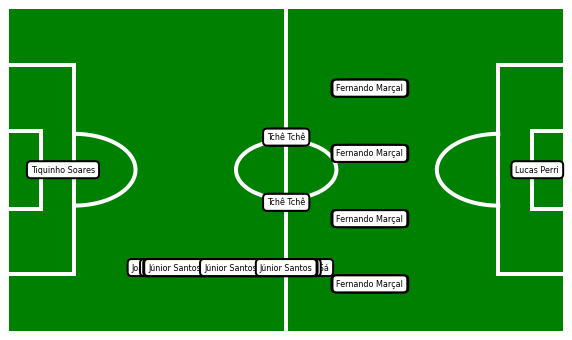

In [414]:
import matplotlib.pyplot as plt
import numpy as np

# Função para converter coordenadas de orientação vertical para horizontal
def converter_coordenadas(coordenada):
    x, y = coordenada
    return (y, 100 - x)

# Coordenadas dos jogadores no campo (ajustadas para as dimensões do campo de futebol)
coordenadas = {
    'GK': (95, 50),
    'DF': [(65, 15), (65, 35), (65, 55), (65, 75)],
    'MCD': [(50, 40), (50, 60)],
    'MCA': [(30, 20), (40, 20), (50, 20)],
    'ATA': (10, 50)
}

# Criando o gráfico
fig, ax = plt.subplots(figsize=(10, 6))  # Tamanho do gráfico em polegadas
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
ax.axis('off')

# Desenhar o gramado
ax.add_patch(plt.Rectangle((0, 0), 100, 100, fill=True, color='green', zorder=0))  # Gramado

# Desenhar as linhas do campo
ax.plot([0, 100, 100, 0, 0], [0, 0, 100, 100, 0], color='white', linewidth=4, zorder=1)  # Linha de contorno
ax.plot([50, 50], [0, 100], color='white', linewidth=4, zorder=1)  # Linha do meio campo
ax.add_patch(plt.Rectangle((0, 18), 12, 64, fill=False, edgecolor='white', linewidth=4, zorder=1))  # Grande área esquerda
ax.add_patch(plt.Rectangle((88, 18), 12, 64, fill=False, edgecolor='white', linewidth=4, zorder=1))  # Grande área direita
ax.add_patch(plt.Rectangle((0, 38), 6, 24, fill=False, edgecolor='white', linewidth=4, zorder=1))  # Pequena área esquerda
ax.add_patch(plt.Rectangle((94, 38), 6, 24, fill=False, edgecolor='white', linewidth=4, zorder=1))  # Pequena área direita

# Circulo central
ax.add_patch(plt.Circle((50, 50), 9, color='white', fill=False, linewidth=4, zorder=1))

# Meia lua da grande área esquerda
theta_left = np.linspace(-np.pi/2, np.pi/2, 100)
x_left = 12 + 11 * np.cos(theta_left)  # Ajuste na posição
y_left = 50 + 11 * np.sin(theta_left)
ax.plot(x_left, y_left, color='white', linewidth=4, zorder=1)

# Meia lua da grande área direita
theta_right = np.linspace(np.pi/2, 3*np.pi/2, 100)
x_right = 88 + 11 * np.cos(theta_right)
y_right = 50 + 11 * np.sin(theta_right)
ax.plot(x_right, y_right, color='white', linewidth=4, zorder=1)

# Plotando os jogadores
for i, row in df_lineup[df_lineup['Team'] == 'Botafogo (RJ)'].iterrows():
    player = row['Player']
    sector = row['Sector']
    if sector not in coordenadas:  # Verifica se o setor está presente nas chaves do dicionário coordenadas
        continue
    if isinstance(coordenadas[sector], tuple):
        ax.text(*coordenadas[sector], player, fontsize=8, ha='center', va='center', zorder=2, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5', linewidth=2))
    else:
        for coord in coordenadas[sector]:
            ax.text(*coord, player, fontsize=8, ha='center', va='center', zorder=2, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5', linewidth=2))

plt.show()


Machine Learning

In [439]:
# Importando as lib de preprocessamento
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
# Importando libs para plotar grafico.
import seaborn as sns
import matplotlib. pyplot as plt
# Importando a lib para separar os dados em treino e teste
from sklearn.model_selection import train_test_split
# Importando a lib para encontrar os melhores parâmetros
from sklearn.model_selection import GridSearchCV
# Importando a lib para o modelo SVM
from sklearn import svm
# impostando o classifation report para avaliar o modelo.
from sklearn.metrics import classification_report, accuracy_score
# Importando a lib para o modelo xgboost
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error

In [440]:
# Convertendo as variáveis para valor numérico
encoder_schema_home = OrdinalEncoder()
df_Analysis['Esquema Casa'] = encoder_schema_home.fit_transform(df_Analysis['Esquema Casa'].values.reshape(-1,1))
encoder_schema_away = OrdinalEncoder()
df_Analysis['Esquema Fora'] = encoder_schema_away.fit_transform(df_Analysis['Esquema Fora'].values.reshape(-1,1))
encoder_result = OrdinalEncoder()
df_Analysis['Resultado'] = encoder_result.fit_transform(df_Analysis['Resultado'].values.reshape(-1,1))

In [441]:
#Verificar se será necessário a aplicação
# Normalizando os dados das variáveis
scaler_home_GK = MinMaxScaler()
df_Analysis['GK Casa'] = scaler_home_GK.fit_transform(df_Analysis['GK Casa'].values.reshape(-1,1))
scaler_home_DF = MinMaxScaler()
df_Analysis['DF Casa'] = scaler_home_DF.fit_transform(df_Analysis['DF Casa'].values.reshape(-1,1))
scaler_home_MCD = MinMaxScaler()
df_Analysis['MCD Casa'] = scaler_home_MCD.fit_transform(df_Analysis['MCD Casa'].values.reshape(-1,1))
scaler_home_MCA = MinMaxScaler()
df_Analysis['MCA Casa'] = scaler_home_MCA.fit_transform(df_Analysis['MCA Casa'].values.reshape(-1,1))
scaler_home_ATA = MinMaxScaler()
df_Analysis['ATA Casa'] = scaler_home_ATA.fit_transform(df_Analysis['ATA Casa'].values.reshape(-1,1))
scaler_home_Goal = MinMaxScaler()
df_Analysis['Gols Casa'] = scaler_home_Goal.fit_transform(df_Analysis['Gols Casa'].values.reshape(-1,1))
scaler_home_Possession = MinMaxScaler()
df_Analysis['Posse Casa'] = scaler_home_Possession.fit_transform(df_Analysis['Posse Casa'].values.reshape(-1,1))
scaler_home_PassingAccuracy = MinMaxScaler()
df_Analysis['Precisão Passe Casa'] = scaler_home_PassingAccuracy.fit_transform(df_Analysis['Precisão Passe Casa'].values.reshape(-1,1))
scaler_home_ShotsTarget = MinMaxScaler()
df_Analysis['Chutes Gol Casa'] = scaler_home_ShotsTarget.fit_transform(df_Analysis['Chutes Gol Casa'].values.reshape(-1,1))
scaler_home_Saves = MinMaxScaler()
df_Analysis['Defesas Casa'] = scaler_home_Saves.fit_transform(df_Analysis['Defesas Casa'].values.reshape(-1,1))

scaler_away_GK = MinMaxScaler()
df_Analysis['GK Fora'] = scaler_away_GK.fit_transform(df_Analysis['GK Fora'].values.reshape(-1,1))
scaler_away_DF = MinMaxScaler()
df_Analysis['DF Fora'] = scaler_away_DF.fit_transform(df_Analysis['DF Fora'].values.reshape(-1,1))
scaler_away_MCD = MinMaxScaler()
df_Analysis['MCD Fora'] = scaler_away_MCD.fit_transform(df_Analysis['MCD Fora'].values.reshape(-1,1))
scaler_away_MCA = MinMaxScaler()
df_Analysis['MCA Fora'] = scaler_away_MCA.fit_transform(df_Analysis['MCA Fora'].values.reshape(-1,1))
scaler_away_ATA = MinMaxScaler()
df_Analysis['ATA Fora'] = scaler_away_ATA.fit_transform(df_Analysis['ATA Fora'].values.reshape(-1,1))
scaler_away_Goal = MinMaxScaler()
df_Analysis['Gols Fora'] = scaler_away_Goal.fit_transform(df_Analysis['Gols Fora'].values.reshape(-1,1))
scaler_away_Possession = MinMaxScaler()
df_Analysis['Posse Fora'] = scaler_away_Possession.fit_transform(df_Analysis['Posse Fora'].values.reshape(-1,1))
scaler_away_PassingAccuracy = MinMaxScaler()
df_Analysis['Precisão Passe Fora'] = scaler_away_PassingAccuracy.fit_transform(df_Analysis['Precisão Passe Fora'].values.reshape(-1,1))
scaler_away_ShotsTarget = MinMaxScaler()
df_Analysis['Chutes Gol Fora'] = scaler_away_ShotsTarget.fit_transform(df_Analysis['Chutes Gol Fora'].values.reshape(-1,1))
scaler_away_Saves = MinMaxScaler()
df_Analysis['Defesas Fora'] = scaler_away_Saves.fit_transform(df_Analysis['Defesas Fora'].values.reshape(-1,1))

In [442]:
# Após ter ajustado (fit) o encoder no seu dataframe
print("Categorias codificadas para 'Resultado':", encoder_result.categories_[0])

Categorias codificadas para 'Resultado': ['D' 'WA' 'WH']


In [443]:
#Conta o número de saídas com 0 = Derrota, 1 = Empate, 2 = Vitória
df_Analysis['Resultado'].value_counts()

2.0    91
0.0    51
1.0    47
Name: Resultado, dtype: int64

In [465]:
df_Analysis.drop('Partida', axis=1, inplace=True)
df_Analysis.drop('Time Casa', axis=1, inplace=True)
df_Analysis.drop('Time Fora', axis=1, inplace=True)

In [466]:
df_Analysis.head(3)

,Esquema Casa,GK Casa,DF Casa,MCD Casa,MCA Casa,ATA Casa,Gols Casa,Posse Casa,Precisão Passe Casa,Chutes Gol Casa,...,DF Fora,MCD Fora,MCA Fora,ATA Fora,Gols Fora,Posse Fora,Precisão Passe Fora,Chutes Gol Fora,Defesas Fora,Resultado
0,8.0,0.183249,0.385946,0.672127,0.231662,0.292991,0.0,0.352941,0.482759,0.141176,...,0.138071,0.782350,0.469760,0.597446,0.6,0.647059,0.787879,0.581395,1.00,1.0
1,8.0,0.536256,0.386212,0.615727,0.359331,0.212451,0.4,0.470588,0.758621,0.341176,...,0.540388,0.690141,0.328086,0.556400,0.2,0.529412,0.636364,0.383721,0.60,2.0
2,8.0,0.534008,0.525685,0.352914,0.642990,0.210710,0.4,0.529412,0.517241,0.635294,...,0.512523,0.000000,0.352527,0.574947,0.2,0.470588,0.363636,0.383721,0.71,2.0


In [467]:
# Aplica a correlação de pearson
df_Analysis.corr(method = 'pearson')

,Esquema Casa,GK Casa,DF Casa,MCD Casa,MCA Casa,ATA Casa,Gols Casa,Posse Casa,Precisão Passe Casa,Chutes Gol Casa,...,DF Fora,MCD Fora,MCA Fora,ATA Fora,Gols Fora,Posse Fora,Precisão Passe Fora,Chutes Gol Fora,Defesas Fora,Resultado
Esquema Casa,1.000000,-0.014980,0.037269,-0.511976,0.005800,0.003288,-0.014235,-0.011946,-0.038868,0.051986,...,-0.071994,-0.047054,-0.063106,-0.132995,-0.035941,0.011590,-0.089845,-0.009589,-0.046348,-0.138489
GK Casa,-0.014980,1.000000,0.043435,-0.016110,-0.015003,0.021313,0.131677,0.222374,0.212517,-0.051858,...,-0.103866,-0.138628,0.016206,-0.047438,0.023041,-0.222808,-0.129712,0.287625,-0.136079,0.002827
DF Casa,0.037269,0.043435,1.000000,0.081323,0.056443,-0.092038,-0.069503,0.486413,0.443532,0.044081,...,-0.165818,-0.168218,-0.103393,0.015538,0.067949,-0.485900,-0.280390,0.066342,0.146078,-0.045835
MCD Casa,-0.511976,-0.016110,0.081323,1.000000,0.005455,-0.033711,0.065092,0.190041,0.272170,0.048533,...,-0.051578,0.044055,-0.024284,-0.040833,-0.131741,-0.189669,0.010695,0.036494,-0.038188,0.242004
MCA Casa,0.005800,-0.015003,0.056443,0.005455,1.000000,0.080375,0.141749,0.075655,0.197389,0.020853,...,-0.054335,-0.216173,-0.081627,0.024381,0.024628,-0.074751,0.081789,-0.142520,-0.114507,-0.006219
ATA Casa,0.003288,0.021313,-0.092038,-0.033711,0.080375,1.000000,0.249625,-0.042928,0.071776,0.079454,...,-0.048764,0.032167,-0.024195,-0.131203,0.067751,0.042443,0.081716,-0.088614,-0.088796,0.076662
Gols Casa,-0.014235,0.131677,-0.069503,0.065092,0.141749,0.249625,1.000000,-0.125812,0.028918,0.426320,...,-0.019392,0.078300,-0.026552,-0.016645,-0.025940,0.125142,0.146228,-0.060889,-0.685775,0.515001
Posse Casa,-0.011946,0.222374,0.486413,0.190041,0.075655,-0.042928,-0.125812,1.000000,0.677601,-0.029224,...,-0.414048,-0.247525,-0.161073,0.057329,-0.008183,-0.999977,-0.747149,-0.006584,0.243702,-0.105567
Precisão Passe Casa,-0.038868,0.212517,0.443532,0.272170,0.197389,0.071776,0.028918,0.677601,1.000000,0.020896,...,-0.181898,-0.172174,-0.031978,0.054192,-0.005099,-0.677038,-0.125774,0.016753,0.083151,0.090070
Chutes Gol Casa,0.051986,-0.051858,0.044081,0.048533,0.020853,0.079454,0.426320,-0.029224,0.020896,1.000000,...,0.000140,0.050953,0.062961,0.019348,-0.067915,0.028952,0.034304,-0.199191,-0.098791,0.246816


<AxesSubplot:>

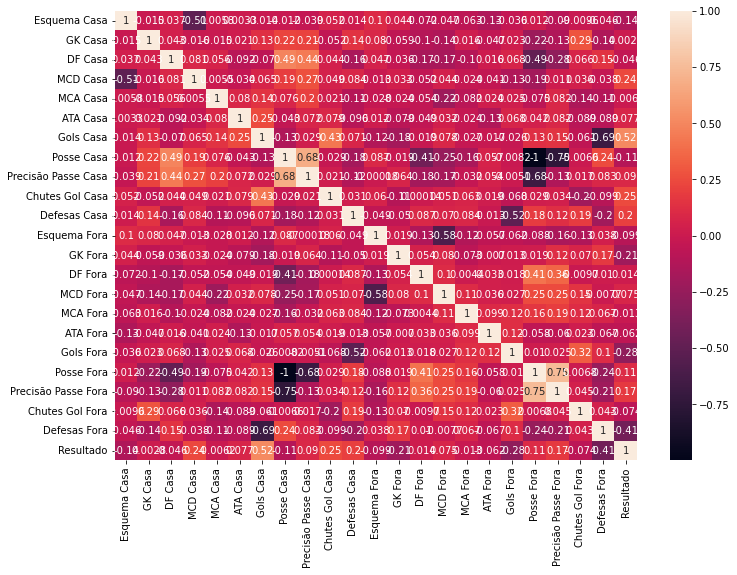

In [468]:
# Exibe a correlação de pearson
a4_dim = (11.7, 8.27)
fig, ax = plt.subplots(figsize = a4_dim)
sns.heatmap(df_Analysis.corr(method = 'pearson'), annot=True)

In [469]:
# Aplica a correlação de spearman
df_Analysis.corr(method = 'spearman')

,Esquema Casa,GK Casa,DF Casa,MCD Casa,MCA Casa,ATA Casa,Gols Casa,Posse Casa,Precisão Passe Casa,Chutes Gol Casa,...,DF Fora,MCD Fora,MCA Fora,ATA Fora,Gols Fora,Posse Fora,Precisão Passe Fora,Chutes Gol Fora,Defesas Fora,Resultado
Esquema Casa,1.000000,-0.031678,0.006794,-0.578780,-0.021631,0.008102,-0.038437,-0.009556,-0.102043,0.061337,...,-0.095370,-0.079322,-0.087720,-0.090583,0.031078,0.008995,-0.097093,-0.043307,0.014170,-0.154160
GK Casa,-0.031678,1.000000,0.085870,-0.031841,0.027351,0.021039,0.131167,0.245654,0.227222,-0.017088,...,-0.096910,-0.131688,0.038519,0.009093,0.009909,-0.245843,-0.180733,0.277766,-0.173148,0.027441
DF Casa,0.006794,0.085870,1.000000,0.085294,0.045770,-0.122053,-0.078305,0.430290,0.414350,0.037792,...,-0.155309,-0.141110,-0.057754,-0.028124,0.060661,-0.430050,-0.216811,0.105292,0.171883,-0.040195
MCD Casa,-0.578780,-0.031841,0.085294,1.000000,0.042316,-0.009607,0.048739,0.193409,0.303965,0.035595,...,-0.083906,0.040600,-0.019721,-0.020666,-0.181998,-0.192950,-0.013748,0.000556,-0.063119,0.255157
MCA Casa,-0.021631,0.027351,0.045770,0.042316,1.000000,0.070492,0.163723,0.058660,0.206178,0.041607,...,-0.083199,-0.254951,-0.084929,0.050133,0.016694,-0.058237,0.085127,-0.105274,-0.153225,0.045080
ATA Casa,0.008102,0.021039,-0.122053,-0.009607,0.070492,1.000000,0.268837,-0.046445,0.099301,0.082069,...,-0.023359,0.059930,-0.041279,-0.141071,0.074817,0.046069,0.091506,-0.077503,-0.139176,0.099031
Gols Casa,-0.038437,0.131167,-0.078305,0.048739,0.163723,0.268837,1.000000,-0.127814,0.063944,0.439948,...,-0.016134,0.078719,-0.064093,-0.076230,-0.025105,0.127261,0.166833,-0.061149,-0.809147,0.574138
Posse Casa,-0.009556,0.245654,0.430290,0.193409,0.058660,-0.046445,-0.127814,1.000000,0.663319,-0.020220,...,-0.396754,-0.238148,-0.135904,0.051441,-0.003219,-0.999988,-0.724882,-0.010962,0.200928,-0.097353
Precisão Passe Casa,-0.102043,0.227222,0.414350,0.303965,0.206178,0.099301,0.063944,0.663319,1.000000,0.024564,...,-0.173804,-0.202666,-0.026869,0.040902,0.005374,-0.662808,-0.120642,-0.000926,-0.008305,0.092667
Chutes Gol Casa,0.061337,-0.017088,0.037792,0.035595,0.041607,0.082069,0.439948,-0.020220,0.024564,1.000000,...,-0.007749,0.028104,0.038720,-0.041801,-0.078022,0.019960,0.038551,-0.180997,-0.187682,0.279066


<AxesSubplot:>

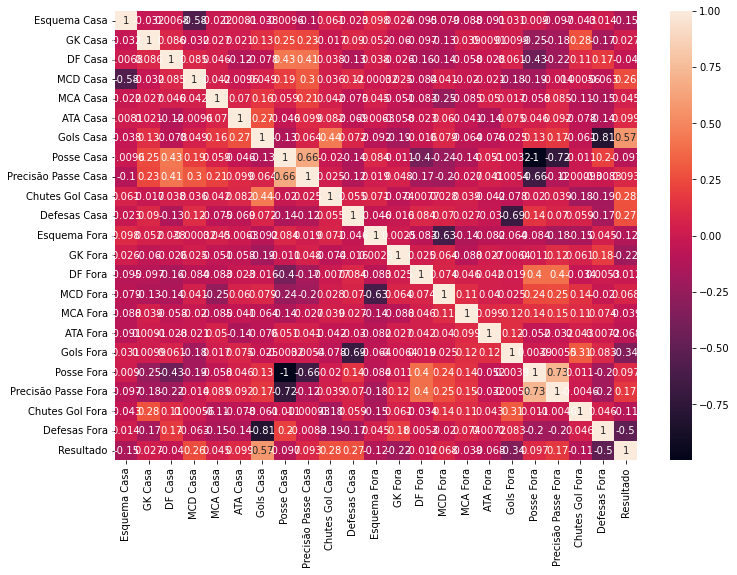

In [470]:
# Exibe a correlação de spearman
a4_dim = (11.7, 8.27)
fig, ax = plt.subplots(figsize = a4_dim)
sns.heatmap(df_Analysis.corr(method = 'spearman'), annot=True)

In [471]:
# Armazenando as variáveis de entrada para o meu modelo.
x = df_Analysis[['Esquema Casa', 'GK Casa', 'DF Casa', 'MCD Casa', 'MCA Casa', 'ATA Casa',
                 'Gols Casa', 'Posse Casa', 'Precisão Passe Casa', 'Chutes Gol Casa', 'Defesas Casa',
                 'Esquema Fora', 'GK Fora', 'DF Fora', 'MCD Fora', 'MCA Fora', 'ATA Fora',
                 'Gols Fora', 'Posse Fora', 'Precisão Passe Fora', 'Chutes Gol Fora', 'Defesas Fora']]
x.head(2)

,Esquema Casa,GK Casa,DF Casa,MCD Casa,MCA Casa,ATA Casa,Gols Casa,Posse Casa,Precisão Passe Casa,Chutes Gol Casa,...,GK Fora,DF Fora,MCD Fora,MCA Fora,ATA Fora,Gols Fora,Posse Fora,Precisão Passe Fora,Chutes Gol Fora,Defesas Fora
0,8.0,0.183249,0.385946,0.672127,0.231662,0.292991,0.0,0.352941,0.482759,0.141176,...,0.519614,0.138071,0.782350,0.469760,0.597446,0.6,0.647059,0.787879,0.581395,1.0
1,8.0,0.536256,0.386212,0.615727,0.359331,0.212451,0.4,0.470588,0.758621,0.341176,...,0.380205,0.540388,0.690141,0.328086,0.556400,0.2,0.529412,0.636364,0.383721,0.6


In [472]:
# Armazenando as variável de saída para o meu modelo
y = df_Analysis['Resultado']
y.head(2)

0    1.0
1    2.0
Name: Resultado, dtype: float64

In [473]:
# Realizando a separação em treino e teste para x e y (70% treino teste)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

APLICAÇÃO DO MODELO SVM

In [474]:
# C = parâmetro de regularização, está definido como 1.0, que é um valor moderado.
# Kernel = função kernel será usada
# gamma='auto' = ajuda a evitar overfitting

# Defina os hiperparâmetros para o SVM
param_grid_svm = {'C': [0.1, 1, 10],
                  'kernel': ['linear', 'rbf'],
                  'gamma': ['scale', 'auto']}

# Instanciando o modelo SVM para classificação.
svm_model = svm.SVC()

In [475]:
# Aplique GridSearchCV e treinando o modelo
grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=5)
grid_search_svm.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']})

In [476]:
# Obter o melhor estimador retornado pelo GridSearchCV
best_svm_model = grid_search_svm.best_estimator_
# Imprima os melhores hiperparâmetros
print("Melhores Hiperparâmetros para SVM:", best_svm_model)

Melhores Hiperparâmetros para SVM: SVC(C=10, kernel='linear')


In [477]:
# Realizando uma predição utilizando o modelo otimizado
y_predict = grid_search_svm.predict(x_test)

In [478]:
# Avaliar o desempenho do modelo
print("Acurácia do modelo SVM:", accuracy_score(y_test, y_predict))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_predict))

Acurácia do modelo SVM: 1.0

Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        12
         1.0       1.00      1.00      1.00        10
         2.0       1.00      1.00      1.00        16

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



TESTE MODELO SVM

In [479]:
# Dados da próxima partida
newMatch = {
    'Esquema Casa': ['4-2-3-1'],
    'GK Casa': [6.53],
    'DF Casa': [16.48],
    'MCD Casa': [12.66], 
    'MCA Casa': [8.65], 
    'ATA Casa': [10.24], 
    'Gols Casa': [0], 
    'Posse Casa': [0], 
    'Precisão Passe Casa': [0], 
    'Chutes Gol Casa': [0], 
    'Defesas Casa': [0],
    'Esquema Fora': ['4-2-2-2'],
    'GK Fora': [8.60],
    'DF Fora': [14.76],
    'MCD Fora': [18.45], 
    'MCA Fora': [12.23], 
    'ATA Fora': [10.81],
    'Gols Fora': [0], 
    'Posse Fora': [0], 
    'Precisão Passe Fora': [0], 
    'Chutes Gol Fora': [0], 
    'Defesas Fora': [0]
}

# Converter para DataFrame
df_NewMatch = pd.DataFrame(newMatch)

# Aplicar as mesmas transformações aos dados da próxima partida
df_NewMatch['Esquema Casa'] = encoder_schema_home.transform(df_NewMatch['Esquema Casa'].values.reshape(-1,1))
df_NewMatch['Esquema Fora'] = encoder_schema_away.transform(df_NewMatch['Esquema Fora'].values.reshape(-1,1))

# Aplica a normalização
df_NewMatch['GK Casa'] = scaler_home_GK.transform(df_NewMatch['GK Casa'].values.reshape(-1,1))
df_NewMatch['DF Casa'] = scaler_home_DF.transform(df_NewMatch['DF Casa'].values.reshape(-1,1))
df_NewMatch['MCD Casa'] = scaler_home_MCD.transform(df_NewMatch['MCD Casa'].values.reshape(-1,1))
df_NewMatch['MCA Casa'] = scaler_home_MCA.transform(df_NewMatch['MCA Casa'].values.reshape(-1,1))
df_NewMatch['ATA Casa'] = scaler_home_ATA.transform(df_NewMatch['ATA Casa'].values.reshape(-1,1))
df_NewMatch['Gols Casa'] = scaler_home_Goal.transform(df_NewMatch['Gols Casa'].values.reshape(-1,1))
df_NewMatch['Posse Casa'] = scaler_home_Possession.transform(df_NewMatch['Posse Casa'].values.reshape(-1,1))
df_NewMatch['Precisão Passe Casa'] = scaler_home_PassingAccuracy.transform(df_NewMatch['Precisão Passe Casa'].values.reshape(-1,1))
df_NewMatch['Chutes Gol Casa'] = scaler_home_ShotsTarget.transform(df_NewMatch['Chutes Gol Casa'].values.reshape(-1,1))
df_NewMatch['Defesas Casa'] = scaler_home_Saves.transform(df_NewMatch['Defesas Casa'].values.reshape(-1,1))
df_NewMatch['GK Fora'] = scaler_away_GK.transform(df_NewMatch['GK Fora'].values.reshape(-1,1))
df_NewMatch['DF Fora'] = scaler_away_DF.transform(df_NewMatch['DF Fora'].values.reshape(-1,1))
df_NewMatch['MCD Fora'] = scaler_away_MCD.transform(df_NewMatch['MCD Fora'].values.reshape(-1,1))
df_NewMatch['MCA Fora'] = scaler_away_MCA.transform(df_NewMatch['MCA Fora'].values.reshape(-1,1))
df_NewMatch['ATA Fora'] = scaler_away_ATA.transform(df_NewMatch['ATA Fora'].values.reshape(-1,1))
df_NewMatch['Gols Fora'] = scaler_away_Goal.transform(df_NewMatch['Gols Fora'].values.reshape(-1,1))
df_NewMatch['Posse Fora'] = scaler_home_Possession.transform(df_NewMatch['Posse Fora'].values.reshape(-1,1))
df_NewMatch['Precisão Passe Fora'] = scaler_away_PassingAccuracy.transform(df_NewMatch['Precisão Passe Fora'].values.reshape(-1,1))
df_NewMatch['Chutes Gol Fora'] = scaler_away_ShotsTarget.transform(df_NewMatch['Chutes Gol Fora'].values.reshape(-1,1))
df_NewMatch['Defesas Fora'] = scaler_away_Saves.transform(df_NewMatch['Defesas Fora'].values.reshape(-1,1))

# Prever o resultado da próxima partida usando o melhor estimador retornado pelo GridSearchCV
resultPredict = best_svm_model.predict(df_NewMatch)

# Transformar o resultado previsto para o formato original
resultPredictEncoded = encoder_result.inverse_transform(resultPredict.reshape(-1, 1))

# Exibir o resultado da previsão
print("Resultado previsto para a próxima partida (Casa x Fora) com o overall de jogadores informados será:", resultPredictEncoded)

Resultado previsto para a próxima partida (Casa x Fora) com o overall de jogadores informados será: [['D']]


APLICAÇÃO DO MODELO XGBoost

In [458]:
# Carregar o conjunto de dados de exemplo (Boston Housing Dataset)
boston = load_boston()
X, y = boston.data, boston.target

In [459]:
# Definir a grade de hiperparâmetros para busca
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 200]
}

# Inicializar o modelo XGBoost
model = xgb.XGBRegressor()

In [460]:
# Inicializar o GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
# Executar a busca em grade
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estim

In [461]:
# Obter os melhores hiperparâmetros encontrados
best_params = grid_search.best_params_
print("Melhores Hiperparâmetros:", best_params)

Melhores Hiperparâmetros: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}


In [462]:
# Fazer previsões no conjunto de teste usando o melhor modelo
best_model = grid_search.best_estimator_
y_predict = best_model.predict(x_test)

In [463]:
# Calcular a métrica de desempenho (RMSE neste caso)
rmse = mean_squared_error(y_test, y_predict, squared=False)
print("RMSE:", rmse)

RMSE: 0.44029906097692956


TESTE MODELO XGBoost

In [464]:
# Dados da próxima partida
newMatch = {
    'Esquema Casa': ['4-2-3-1'],
    'GK Casa': [6.53],
    'DF Casa': [16.48],
    'MCD Casa': [12.66], 
    'MCA Casa': [8.65], 
    'ATA Casa': [10.24], 
    'Gols Casa': [0], 
    'Posse Casa': [0], 
    'Precisão Passe Casa': [0], 
    'Chutes Gol Casa': [0], 
    'Defesas Casa': [0],
    'Esquema Fora': ['4-2-2-2'],
    'GK Fora': [8.60],
    'DF Fora': [14.76],
    'MCD Fora': [18.45], 
    'MCA Fora': [12.23], 
    'ATA Fora': [10.81],
    'Gols Fora': [0], 
    'Posse Fora': [0], 
    'Precisão Passe Fora': [0], 
    'Chutes Gol Fora': [0], 
    'Defesas Fora': [0]
}

# Converter para DataFrame
df_NewMatch = pd.DataFrame(newMatch)

# Aplicar as mesmas transformações aos dados da próxima partida
df_NewMatch['Esquema Casa'] = encoder_schema_home.transform(df_NewMatch['Esquema Casa'].values.reshape(-1,1))
df_NewMatch['Esquema Fora'] = encoder_schema_away.transform(df_NewMatch['Esquema Fora'].values.reshape(-1,1))

# Aplica a normalização
df_NewMatch['GK Casa'] = scaler_home_GK.transform(df_NewMatch['GK Casa'].values.reshape(-1,1))
df_NewMatch['DF Casa'] = scaler_home_DF.transform(df_NewMatch['DF Casa'].values.reshape(-1,1))
df_NewMatch['MCD Casa'] = scaler_home_MCD.transform(df_NewMatch['MCD Casa'].values.reshape(-1,1))
df_NewMatch['MCA Casa'] = scaler_home_MCA.transform(df_NewMatch['MCA Casa'].values.reshape(-1,1))
df_NewMatch['ATA Casa'] = scaler_home_ATA.transform(df_NewMatch['ATA Casa'].values.reshape(-1,1))
df_NewMatch['Gols Casa'] = scaler_home_Goal.transform(df_NewMatch['Gols Casa'].values.reshape(-1,1))
df_NewMatch['Posse Casa'] = scaler_home_Possession.transform(df_NewMatch['Posse Casa'].values.reshape(-1,1))
df_NewMatch['Precisão Passe Casa'] = scaler_home_PassingAccuracy.transform(df_NewMatch['Precisão Passe Casa'].values.reshape(-1,1))
df_NewMatch['Chutes Gol Casa'] = scaler_home_ShotsTarget.transform(df_NewMatch['Chutes Gol Casa'].values.reshape(-1,1))
df_NewMatch['Defesas Casa'] = scaler_home_Saves.transform(df_NewMatch['Defesas Casa'].values.reshape(-1,1))
df_NewMatch['GK Fora'] = scaler_away_GK.transform(df_NewMatch['GK Fora'].values.reshape(-1,1))
df_NewMatch['DF Fora'] = scaler_away_DF.transform(df_NewMatch['DF Fora'].values.reshape(-1,1))
df_NewMatch['MCD Fora'] = scaler_away_MCD.transform(df_NewMatch['MCD Fora'].values.reshape(-1,1))
df_NewMatch['MCA Fora'] = scaler_away_MCA.transform(df_NewMatch['MCA Fora'].values.reshape(-1,1))
df_NewMatch['ATA Fora'] = scaler_away_ATA.transform(df_NewMatch['ATA Fora'].values.reshape(-1,1))
df_NewMatch['Gols Fora'] = scaler_away_Goal.transform(df_NewMatch['Gols Fora'].values.reshape(-1,1))
df_NewMatch['Posse Fora'] = scaler_home_Possession.transform(df_NewMatch['Posse Fora'].values.reshape(-1,1))
df_NewMatch['Precisão Passe Fora'] = scaler_away_PassingAccuracy.transform(df_NewMatch['Precisão Passe Fora'].values.reshape(-1,1))
df_NewMatch['Chutes Gol Fora'] = scaler_away_ShotsTarget.transform(df_NewMatch['Chutes Gol Fora'].values.reshape(-1,1))
df_NewMatch['Defesas Fora'] = scaler_away_Saves.transform(df_NewMatch['Defesas Fora'].values.reshape(-1,1))

# Prever o resultado da próxima partida usando o melhor estimador retornado pelo GridSearchCV
resultPredict = best_model.predict(df_NewMatch)

# Transformar o resultado previsto para o formato original
resultPredictEncoded = encoder_result.inverse_transform(resultPredict.reshape(-1, 1))

# Exibir o resultado da previsão
print("Resultado previsto para a próxima partida (Casa x Fora) com o overall de jogadores informados será:", resultPredictEncoded)

#Incluir overall do adversário
#Usar os 4 times do G4 para testes
#Aplicar modelo Xgboost

Resultado previsto para a próxima partida (Casa x Fora) com o overall de jogadores informados será: [['WA']]
